For the prediction of the outcome of the TEAM A X TEAM B game, we will feed the model with the stats of the mean past 10 games of team A at HOME and the mean past 10 games of team B away

Features description

    ### Basic Box Score Stats




    MP -- Minutes Played

    FG -- Field Goals

    FGA -- Field Goal Attempts

    FG% -- Field Goal Percentage

    3P -- 3-Point Field Goals

    3PA -- 3-Point Field Goal Attempts

    3P% -- 3-Point Field Goal Percentage

    FT -- Free Throws

    FTA -- Free Throw Attempts

    FT% -- Free Throw Percentage

    ORB -- Offensive Rebounds

    DRB -- Defensive Rebounds

    TRB -- Total Rebounds
    AST -- Assists

    STL -- Steals

    BLK -- Blocks

    TOV -- Turnovers

    PF -- Personal Fouls

    PTS -- Points

    +/- -- Plus/Minus

    MP -- Minutes Played

    FG -- Field Goals

    FGA -- Field Goal Attempts

    FG% -- Field Goal Percentage

    3P -- 3-Point Field Goals

    3PA -- 3-Point Field Goal Attempts

    3P% -- 3-Point Field Goal Percentage

    FT -- Free Throws

    FTA -- Free Throw Attempts

    FT% -- Free Throw Percentage

    ORB -- Offensive Rebounds

    DRB -- Defensive Rebounds

    TRB -- Total Rebounds

    AST -- Assists

    STL -- Steals

    BLK -- Blocks

    TOV -- Turnovers

    PF -- Personal Fouls

    PTS -- Points

    +/- -- Plus/Minus


    ### Advanced Box Score Stats

    MP -- Minutes Played

    TS% -- True Shooting Percentage
    A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.

    eFG% -- Effective Field Goal Percentage
    This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

    3PAr -- 3-Point Attempt Rate
    Percentage of FG Attempts from 3-Point Range

    FTr -- Free Throw Attempt Rate
    Number of FT Attempts Per FG Attempt

    ORB% -- Offensive Rebound Percentage
    An estimate of the percentage of available offensive rebounds a player grabbed while they were on the floor.

    DRB% -- Defensive Rebound Percentage
    An estimate of the percentage of available defensive rebounds a player grabbed while they were on the floor.

    TRB% -- Total Rebound Percentage
    An estimate of the percentage of available rebounds a player grabbed while they were on the floor.

    AST% -- Assist Percentage
    An estimate of the percentage of teammate field goals a player assisted while they were on the floor.

    STL% -- Steal Percentage
    An estimate of the percentage of opponent possessions that end with a steal by the player while they were on the floor.

    BLK% -- Block Percentage
    An estimate of the percentage of opponent two-point field goal attempts blocked by the player while they were on the floor.

    TOV% -- Turnover Percentage
    An estimate of turnovers committed per 100 plays.

    USG% -- Usage Percentage
    An estimate of the percentage of team plays used by a player while they were on the floor.

    ORtg -- Offensive Rating
    An estimate of points produced (players) or scored (teams) per 100 possessions

    DRtg -- Defensive Rating
    An estimate of points allowed per 100 possessions

    BPM -- Box Plus/Minus
    A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.

    MP -- Minutes Played

    TS% -- True Shooting Percentage
    A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.

    eFG% -- Effective Field Goal Percentage
    This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

    3PAr -- 3-Point Attempt Rate
    Percentage of FG Attempts from 3-Point Range

    FTr -- Free Throw Attempt Rate
    Number of FT Attempts Per FG Attempt

    ORB% -- Offensive Rebound Percentage
    An estimate of the percentage of available offensive rebounds a player grabbed while they were on the floor.

    DRB% -- Defensive Rebound Percentage
    An estimate of the percentage of available defensive rebounds a player grabbed while they were on the floor.

    TRB% -- Total Rebound Percentage
    An estimate of the percentage of available rebounds a player grabbed while they were on the floor.

    AST% -- Assist Percentage
    An estimate of the percentage of teammate field goals a player assisted while they were on the floor.

    STL% -- Steal Percentage
    An estimate of the percentage of opponent possessions that end with a steal by the player while they were on the floor.

    BLK% -- Block Percentage
    An estimate of the percentage of opponent two-point field goal attempts blocked by the player while they were on the floor.

    TOV% -- Turnover Percentage
    An estimate of turnovers committed per 100 plays.

    USG% -- Usage Percentage
    An estimate of the percentage of team plays used by a player while they were on the floor.

    ORtg -- Offensive Rating
    An estimate of points produced (players) or scored (teams) per 100 possessions

    DRtg -- Defensive Rating
    An estimate of points allowed per 100 possessions

    BPM -- Box Plus/Minus
    A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy, sqlite3
import os
import warnings

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import make_pipeline

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

We first gonna extract our stored data from the database created on the webscraping step.

In [2]:
engine = sqlalchemy.create_engine('sqlite:///nba_games.db', echo=False)

df = pd.read_sql('SELECT * FROM nba_games', con=engine)

Exploring data

In [3]:
df.head()

,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,opponent_tov%_max,opponent_usg%_max,opponent_ortg_max,opponent_drtg_max,opponent_Team,opponent_Total,opponent_season,opponent_date,opponent_home,WIN
0,240.0,240.0,37.0,99.0,0.374,10.0,33.0,0.303,15.0,23.0,...,43.6,40.4,300.0,98.0,BRK,125,2020-21,2020-12-22,1,0
1,240.0,240.0,42.0,92.0,0.457,15.0,35.0,0.429,26.0,32.0,...,50.0,32.1,267.0,120.0,GSW,99,2020-21,2020-12-22,0,1
2,240.0,240.0,44.0,93.0,0.473,14.0,40.0,0.350,14.0,19.0,...,100.0,35.9,166.0,118.0,LAL,109,2020-21,2020-12-22,1,1
3,240.0,240.0,38.0,81.0,0.469,9.0,29.0,0.310,24.0,31.0,...,20.9,40.2,154.0,114.0,LAC,116,2020-21,2020-12-22,0,0
4,240.0,240.0,46.0,90.0,0.511,14.0,35.0,0.400,15.0,18.0,...,33.3,39.2,203.0,126.0,BOS,122,2020-21,2020-12-23,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Columns: 152 entries, mp to WIN
dtypes: float64(134), int64(6), object(12)
memory usage: 5.8+ MB


In [5]:
df.columns.to_list()

['mp',
 'mp.1',
 'fg',
 'fga',
 'fg%',
 '3p',
 '3pa',
 '3p%',
 'ft',
 'fta',
 'ft%',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 '+/-',
 'ts%',
 'efg%',
 '3par',
 'ftr',
 'orb%',
 'drb%',
 'trb%',
 'ast%',
 'stl%',
 'blk%',
 'tov%',
 'usg%',
 'ortg',
 'drtg',
 'mp_max',
 'mp_max.1',
 'fg_max',
 'fga_max',
 'fg%_max',
 '3p_max',
 '3pa_max',
 '3p%_max',
 'ft_max',
 'fta_max',
 'ft%_max',
 'orb_max',
 'drb_max',
 'trb_max',
 'ast_max',
 'stl_max',
 'blk_max',
 'tov_max',
 'pf_max',
 'pts_max',
 '+/-_max',
 'ts%_max',
 'efg%_max',
 '3par_max',
 'ftr_max',
 'orb%_max',
 'drb%_max',
 'trb%_max',
 'ast%_max',
 'stl%_max',
 'blk%_max',
 'tov%_max',
 'usg%_max',
 'ortg_max',
 'drtg_max',
 'Team',
 'Total',
 'season',
 'date',
 'home',
 'opponent_index',
 'opponent_mp',
 'opponent_mp.1',
 'opponent_fg',
 'opponent_fga',
 'opponent_fg%',
 'opponent_3p',
 'opponent_3pa',
 'opponent_3p%',
 'opponent_ft',
 'opponent_fta',
 'opponent_ft%',
 'opponent_orb',
 'opponent_drb',

## Overtime exceptions
We are going to delete some non useful or redundant info, as well as the rows where the number of minutes played != 240, because these are some outliers, and we will then remove the  mp variable alltogheter

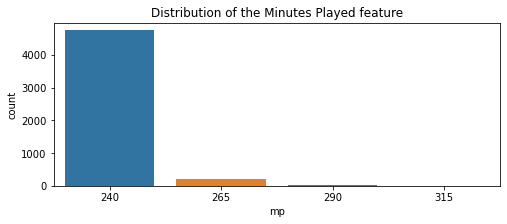

In [6]:
plt.figure(num=1, figsize=(8, 3))

plt.title('Distribution of the Minutes Played feature')
sns.countplot(df['mp'].astype(int));


In [7]:
print('outliers porcentage: {:.2%}'.format(len(df[df['mp'] != 240])/len(df)))

 #deleting outliers rows   
df = df[df['mp'] == 240]
df.shape

outliers porcentage: 4.78%


(4746, 152)

* We need just one stat for minutes played;
* we will need the +/-_max stats, because the max diference that a player made could be important;
* altough the team name, season, and date are irrelevant for training, they will be important for organization. But these stats for the opponent side could be deleted
* Home will be needed just one time also.

In [8]:
del_list = ['mp','mp.1','+/-','mp_max','mp_max.1',
 'opponent_index','opponent_mp',
 'opponent_mp.1','opponent_+/-','opponent_mp_max.1', 'opponent_mp_max',
  'opponent_Team', 'opponent_date', 'opponent_home', 'opponent_season']


for col in del_list:
    if col in df.columns:
        del df[col]

Our traning set has to match our predict idea, so each row will be the mean of last 10 games for each team.

In [9]:
df.groupby(['Team', 'season'], group_keys=False).rolling(2).mean()

fg   fga     fg%    3p   3pa     3p%    ft   fta     ft%  \
Team season                                                                     
ATL  2020-21 6      NaN   NaN     NaN   NaN   NaN     NaN   NaN   NaN     NaN   
             44    40.5  84.5  0.4825  13.5  35.5  0.3805  28.5  33.5  0.8480   
             79    39.0  85.5  0.4575  16.5  39.0  0.4185  30.5  35.0  0.8715   
             110   43.5  90.5  0.4815  19.0  44.0  0.4335  28.5  33.5  0.8520   
             134   45.0  96.0  0.4685  17.0  42.5  0.4005  20.5  24.5  0.8430   
...                 ...   ...     ...   ...   ...     ...   ...   ...     ...   
WAS  2021-22 4668  43.5  86.0  0.5035  12.5  27.0  0.4480  19.0  21.0  0.9045   
             4702  47.0  91.5  0.5085  10.5  25.5  0.4070  12.5  17.0  0.7000   
             4716  49.0  93.5  0.5210  11.5  32.5  0.3595   8.0  12.5  0.6590   
             4759  38.5  77.5  0.4975   9.5  31.5  0.3035  11.0  14.0  0.7915   
             4770  38.5  81.5  0.4770   8.5  25.5  0.3345  14.5  21.5  0.6900   

                    orb  ...  opponent_trb%_max  opponent_ast%_max  \
Team season              ...                                         
ATL  2020-21 6      NaN  ...                NaN                NaN   
             44    10.5  ...              17.75              38.90   
             79    10.5  ...              24.25              40.00   
             110   12.5  ...              27.90              35.10   
             134   13.5  ...              22.20              40.05   
...                 ...  ...                ...                ...   
WAS  2021-22 4668   7.5  ...              21.30              52.15   
             4702   8.0  ...              19.95              63.25   
             4716   7.5  ...              27.25              53.35   
             4759   4.0  ...              27.45              44.55   
             4770   9.5  ...              18.35              44.65   

                   opponent_stl%_max  opponent_blk%_max  opponent_tov%_max  \
Team season                                                                  
ATL  2020-21 6                   NaN                NaN                NaN   
             44                 4.95               6.10              30.80   
             79                 5.30               8.40              23.90   
             110                3.85               8.50              18.95   
             134                3.00               6.25              33.95   
...                              ...                ...                ...   
WAS  2021-22 4668               3.95               6.70              25.40   
             4702               5.15               6.60              23.75   
             4716               6.10               3.70              19.60   
             4759              17.70               5.25              33.35   
             4770              15.80              29.65              75.00   

                   opponent_usg%_max  opponent_ortg_max  opponent_drtg_max  \
Team season                                                                  
ATL  2020-21 6                   NaN                NaN                NaN   
             44                38.85              229.5              123.5   
             79                33.85              243.0              131.5   
             110               33.40              213.5              139.5   
             134               33.90              224.0              133.5   
...                              ...                ...                ...   
WAS  2021-22 4668              37.50              193.0              129.5   
             4702              33.60              206.5              124.0   
             4716              46.50              163.5              123.0   
             4759              47.85              147.0              109.0   
             4770              36.40              148.0              111.0   

                   opponen

In [10]:
df.groupby('season').count()

,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,opponent_trb%_max,opponent_ast%_max,opponent_stl%_max,opponent_blk%_max,opponent_tov%_max,opponent_usg%_max,opponent_ortg_max,opponent_drtg_max,opponent_Total,WIN
season,,,,,,,,,,,,,,,,,,,,,
2020-21,2220,2220,2220,2220,2220,2220,2220,2220,2220,2220,...,2220,2220,2220,2220,2220,2220,2220,2220,2220,2220
2021-22,2526,2526,2526,2526,2526,2526,2526,2526,2526,2526,...,2526,2526,2526,2526,2526,2526,2526,2526,2526,2526


Checking for null values

In [9]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, df[col].isna().sum())


After this first superficial look, we are going select the most valuable features with sklearn sequential feature selection, using for this the Linear Support Vector Classification to get the first 40 atributes that are more significative.

In [10]:
X = df.loc[:, df.columns != 'WIN']
y = df['WIN']

In [11]:
X

,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,opponent_drb%_max,opponent_trb%_max,opponent_ast%_max,opponent_stl%_max,opponent_blk%_max,opponent_tov%_max,opponent_usg%_max,opponent_ortg_max,opponent_drtg_max,opponent_Total
0,37.0,99.0,0.374,10.0,33.0,0.303,15.0,23.0,0.652,13.0,...,44.5,29.8,33.0,7.3,7.4,43.6,40.4,300.0,98.0,125
1,42.0,92.0,0.457,15.0,35.0,0.429,26.0,32.0,0.813,13.0,...,50.1,29.7,61.1,3.7,12.7,50.0,32.1,267.0,120.0,99
2,44.0,93.0,0.473,14.0,40.0,0.350,14.0,19.0,0.737,11.0,...,39.6,24.4,47.0,4.3,3.9,100.0,35.9,166.0,118.0,109
3,38.0,81.0,0.469,9.0,29.0,0.310,24.0,31.0,0.774,8.0,...,38.7,16.9,24.2,4.7,4.5,20.9,40.2,154.0,114.0,116
4,46.0,90.0,0.511,14.0,35.0,0.400,15.0,18.0,0.833,11.0,...,26.9,19.3,22.2,3.8,7.0,33.3,39.2,203.0,126.0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,34.0,85.0,0.400,15.0,38.0,0.395,14.0,19.0,0.737,11.0,...,29.1,20.0,30.2,6.1,10.3,42.9,36.3,133.0,112.0,107
4980,31.0,75.0,0.413,11.0,32.0,0.344,21.0,31.0,0.677,8.0,...,31.5,17.1,59.5,5.7,7.6,33.3,36.2,222.0,107.0,104
4981,41.0,88.0,0.466,9.0,40.0,0.225,13.0,15.0,0.867,4.0,...,84.8,42.4,100.0,2.3,12.4,45.0,94.4,300.0,112.0,94
4982,38.0,92.0,0.413,19.0,46.0,0.413,8.0,8.0,1.000,15.0,...,100.0,53.8,38.7,3.9,16.0,100.0,42.6,141.0,126.0,90


There are some usefull columns that we wont use for tranining, but for indexing. Date and teamwill be useful for knowing the past 10 games of a team, and season will be usefull if we decide to train data per season

In [12]:
info_cols = ['date', 'Team', 'season']
model_cols = X.columns[~X.columns.isin(info_cols)]	#only usefull for ML columns

In [13]:
X[info_cols]

,date,Team,season
0,2020-12-22,GSW,2020-21
1,2020-12-22,BRK,2020-21
2,2020-12-22,LAC,2020-21
3,2020-12-22,LAL,2020-21
4,2020-12-23,MIL,2020-21
...,...,...,...
4979,2022-06-10,BOS,2021-22
4980,2022-06-13,BOS,2021-22
4981,2022-06-13,GSW,2021-22
4982,2022-06-16,GSW,2021-22


As we have many columns, we will run the feature selection method to extract only features that will be meaningful for training the model

We are going to use with this method , the TimeSeriesSplit method, because we dont want just to split totaly randonly the data for training and validation, as we want to use accordnly with the period of time. For example, I can use this to train against data per season.



In [14]:
#minmaxscaler with traning data parameters
scaler = MinMaxScaler()
scaler.fit(X[model_cols])
#creating the pipeline
clf = make_pipeline(scaler, LinearSVC(random_state=42, C=1, tol=1e-5))
#creating the cross validation knowing that we gonna use different dates
split = TimeSeriesSplit(n_splits=5)
#choosing the number of features to select, it will be the first 40 features iteratively
sls = SequentialFeatureSelector(clf, n_features_to_select=25, cv=split, n_jobs=-1, direction='backward')


In [15]:
#looking at our new data
X_transf = scaler.transform(X[model_cols])
X_transf = pd.DataFrame(X_transf, columns=model_cols)
X_transf.head()

,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,...,opponent_drb%_max,opponent_trb%_max,opponent_ast%_max,opponent_stl%_max,opponent_blk%_max,opponent_tov%_max,opponent_usg%_max,opponent_ortg_max,opponent_drtg_max,opponent_Total
0,0.350,0.673469,0.236585,0.296296,0.433962,0.366057,0.333333,0.422222,0.497110,0.48,...,0.330519,0.227723,0.202381,0.073,0.074,0.408805,0.234917,1.000000,0.168831,0.611765
1,0.475,0.530612,0.439024,0.481481,0.471698,0.575707,0.638889,0.622222,0.729769,0.48,...,0.398070,0.226623,0.536905,0.037,0.127,0.475891,0.128370,0.829897,0.454545,0.305882
2,0.525,0.551020,0.478049,0.444444,0.566038,0.444260,0.305556,0.333333,0.619942,0.40,...,0.271411,0.168317,0.369048,0.043,0.039,1.000000,0.177150,0.309278,0.428571,0.423529
3,0.375,0.306122,0.468293,0.259259,0.358491,0.377704,0.583333,0.600000,0.673410,0.28,...,0.260555,0.085809,0.097619,0.047,0.045,0.170860,0.232349,0.247423,0.376623,0.505882
4,0.575,0.489796,0.570732,0.444444,0.471698,0.527454,0.333333,0.311111,0.758671,0.40,...,0.118215,0.112211,0.073810,0.038,0.070,0.300839,0.219512,0.500000,0.532468,0.576471


In [18]:
sls.fit(X[model_cols], y)

In [ ]:
# getting the selected features
predictors = list(model_cols[sls.get_support()]) # the list will contain only columns that get support say it is true, from model columns
predictors

['fg',
 'trb',
 'ast',
 'stl',
 'trb%',
 'ast%',
 'stl%',
 'usg%',
 'ortg',
 'drtg',
 'fga_max',
 'ft%_max',
 'drb_max',
 'stl_max',
 '+/-_max',
 '3par_max',
 'blk%_max',
 'usg%_max',
 'opponent_usg%',
 'opponent_ortg',
 'opponent_drtg',
 'opponent_fga_max',
 'opponent_stl_max',
 'opponent_+/-_max',
 'opponent_drb%_max']

In [ ]:
scaler.fit_transform(X[model_cols])

array([[0.35      , 0.67346939, 0.23658537, ..., 1.        , 0.16883117,
        0.61176471],
       [0.475     , 0.53061224, 0.43902439, ..., 0.82989691, 0.45454545,
        0.30588235],
       [0.525     , 0.55102041, 0.47804878, ..., 0.30927835, 0.42857143,
        0.42352941],
       ...,
       [0.45      , 0.44897959, 0.46097561, ..., 1.        , 0.35064935,
        0.24705882],
       [0.375     , 0.53061224, 0.33170732, ..., 0.18041237, 0.53246753,
        0.2       ],
       [0.275     , 0.28571429, 0.36097561, ..., 0.41237113, 0.33766234,
        0.35294118]])